# Meetup 1

Going to parse texts for most used words. 

In [9]:
# Lets see how many lines are in the PDF
# We can use the '!' special character to run Linux commands inside of our notebook

!wc -l test.txt

8818 test.txt


In [11]:
# Now lets see how many words

!wc -w test.txt

69087 test.txt


In [5]:
import nltk
from nltk import tokenize

In [ ]:
# Lets open the file so we can access the ascii contents
# fd stands for file descriptor but we can use whatever name we want
# the open command returns a file descripor object, which itself isn't very useful
# so we need to read the entire contents so we have a text string we can parse
# advanced: use a context manager with open() as x:

fd = open('test.txt', 'r')
text = fd.read()
text

We want to "tokenize" the text and discard "stopwords" like 'a', 'the', 'in'. These words aren't relevant for our analysis.

To tokenize our text we're going to use regular expressions. Regular expressions are cool and you should try to use them whenever you can. To use regular expression we need to `import` the regular expression module `re`. Lets do this in the next cell!!

In [12]:
# import the regular expression module
import re

We want to tokenize **words**. We will use `\w+` regular expression to tokenize all the words.
- Lets break this down - `\w` will match any alphanumerica and underscore characters
- The `+` 

In [23]:
match_words = '\w+'
tokens = re.findall(match_words, text)
tokens[0:9]


['ALGORITHMIC',
 'TRADING',
 'Founded',
 'in',
 '1807',
 'John',
 'Wiley',
 'Sons',
 'is']

In [21]:
# We can also use nltk to accomplish the same thing
# from nltk.tokenize import RegexpTokenizer
# tokenizer = RegexpTokenizer('\w+')
# tokenizer.tokenize(text)

That was the easy part..... We want all the data(text) to be "normalized". The word 'Linear' is different then the word 'linear' but for our case it shouldn't be counted twice. 

Lets create a Python list container/data structure to store all of our words. For a more in depth look at Python lists and how to use them efficiently take a look at .....

In [24]:
words = []
for word in tokens:
    words.append(word.lower())
words[0:8]

['algorithmic', 'trading', 'founded', 'in', '1807', 'john', 'wiley', 'sons']

Now we must...clean the data yet more. It's like when you think you've cleaned your room but your mom tells you it ain't that clean yet. 

In [28]:
#Here we want a list of common stopwords but we need to download them first.
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /home/rvaz/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words  = nltk.corpus.stopwords.words('english')
stop_words

Now we have a Python list of stop words and a Python list of words in our text. We want to cross reference the tokens with the stop words and save those in a new list. Lets do that....

In [33]:
words_nsw = []
for w in words:
    if w not in stop_words:
        words_nsw.append(w)
words_nsw[0:11]

['algorithmic',
 'trading',
 'founded',
 '1807',
 'john',
 'wiley',
 'sons',
 'oldest',
 'independent',
 'publishing',
 'company']

Now comes the real fun stuff. Lets plot the word frequency histogram with two lines of actual code.

In [37]:
# lets import a graphing and data visualization library
import matplotlib.pyplot as plt

# Lets tell jupyter notebook to display images inside our notebook
# %matplotlib inline

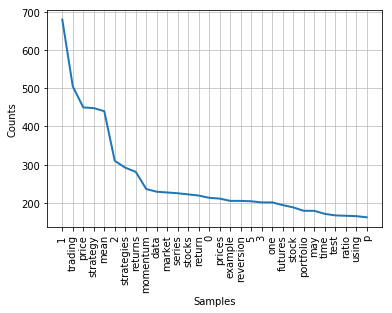

In [38]:
freq_dist = nltk.FreqDist(words_nsw)
freq_dist.plot(30)